# VI Seminário de Avaliação de Pesquisa Científica e Tecnológica (SAPCT) e V Workshop de Integração e Capacitação em Processamento de Alto Desempenho (ICPAD)
## Geração Automática de Código Através de Computação Simbólica em Python: Introdução à LDE Devito
**Prof. Dr. Oscar Mojica (<a>https://oscar-mojica.netlify.app/</a>) <br/>Centro de Supercomputação para Inovação Industrial <br/>Senai Cimatec**
<hr/>

# Computação simbólica

Denomina-se computacão algébrica (CA) a manipulação de símbolos matemáticos - feita no computador - de acordo com as regras abstratas da matemática simbólica. Entre os mais conhecidos softwares que
permitem este tipo de manipulação estão o [Maple](https://www.maplesoft.com/) e o [Mathematica](https://www.wolfram.com/mathematica/). Nestes sistemas de CA encontramse implementadas, por exemplo, regras de álgebra, trigonometria e cálculo, de modo que pesquisadores e estudantes podem derivar, integrar, obter a solução de equações diferenciais, simplificar expressões, representar graficamente campos escalares, vetoriais e curvas paramêtricas. Além dos comandos usuais, esses sistemas de CA permitem um fácil e rápido desenvolvimento de programas matemáticos, através de um repertório vasto de funções e operações.

Na computação simbólica é possível manipular símbolos (não obrigatoriamente expressões decimais), representando números inteiros, racionais, irracionais, imaginários, ou, ainda, polinômios, funções, matrizes, sequências, sistemas de equações e até mesmo estruturas mais abstratas, como equações diferenciais. Enquanto em Computação Numérica se opera apenas com aproximações de decimais finitas para números reais, em Computação Algébrica é possível operar com símbolos que representam objetos matemáticos mais gerais (além de números).

Por exemplo, ao se calcular $\sqrt{2}\sqrt{3}$ usando uma calculadora ou um programa de Computação Numérica, o resultado será 1,4142135 × 1,7320508 = 2,4494897.

Por outro lado, um programa de computação algébrica mostrará resultado como sendo $\sqrt{2}\sqrt{3}=\sqrt{6}$, algo bastante próximo do que se faz em sala de aula, ou o que pode-se encontrar num artigo científico. Assim, um programa desse tipo efetua cálculos com radicais sem a necessidade de representá-los em forma decimal aproximada, pois “conhece” as regras e propriedades algébricas dos objetos envolvidos.

## Computação Simbólica em Python com SimPy

Em primeiro lugar, o que é SimPy ? Na documentação, eles o definem como: “um framework baseado em processos com simulação de eventos discretos utilizando as bibliotecas padrão do Python”. Você pode ver a documentação completa [aqui](https://simpy-portuguese-br.readthedocs.io/pt_BR/latest/), que eu recomendo fortemente. Lá você pode encontrar não apenas as coisas que você pode fazer, mas também muitos tutoriais simples, mas muito úteis. Simpy é de fácil uso e disponibilizado como software livre, sendo portanto amplamente usado na academias e indústria.

## Execução de código Python
Existem algumas maneiras de executar o Python:

1. Escreva seu código em um arquivo de texto com a extensão **`py`**. Em seguida, no terminal, digite **`python myPythonCode.py`**
2. Use um dos editores que acompanham o python. O Anaconda é fornecido com o `Spyder`. Outro editor famoso é o <a href="https://www.jetbrains.com/pycharm/"> `PyCharm` </a>. Usando esses editores (na verdade, Integrated Development Environments, IDEs), você pode escrever código e executá-lo no local.
3. Use o Jupyter Notebook. Esta é minha abordagem favorita, pois permite que você escreva código Python de dentro de seu navegador e o misture com texto e equações. Basta abrir um terminal (prompt de comando no Windows) e digitar **`jupyter notebook`**.

### Operações básicas e considerações iniciais

Como mencionado anteriormente, a computação simbólica envolve a computação de objetos matemáticos simbolicamente. Isso significa que os objetos matemáticos são representados exatamente, não aproximadamente, e expressões matemáticas com variáveis não avaliadas são deixadas em forma simbólica, ou algébrica.
Vamos começar com o exemplo introdutório:

In [1]:
import sympy as sym # importa as funções do sympy em um contexto diferenciado (no caso sym)
from sympy import *

In [2]:
import math
print('A raiz de 9 é:', math.sqrt(9))
print('A raiz de 8 é:', math.sqrt(8))

A raiz de 9 é: 3.0
A raiz de 8 é: 2.8284271247461903


In [3]:
print('A raiz de 9 é:', sym.sqrt(9))
print('A raiz de 8 é:', sym.sqrt(8))

A raiz de 9 é: 3
A raiz de 8 é: 2*sqrt(2)


É importante dizer para o sympy quais objetos são SÍMBOLOS;

In [4]:
x, y, z, t = symbols("x y z t") # Define símbolos para variáveis genericas

In [5]:
k, m, n = symbols("k m n", integer=True)  # Define símbolos para variáveis inteiras

os identificadores (variáveis) “x, y, z, t” são variáveis simbólicas e serão tratadas como objetos sympy, e não mais como identificadores usuais do Python. Podemos, então definir funções com essas variáveis e usá-las em expressões algébricas.

In [6]:
3*pi/2 + sym.exp(I*x) / (x**2 + y)

3*pi/2 + exp(I*x)/(x**2 + y)

Algumas ações que podem ser feitas com expressões simbólicas: expandir (expand), factorizar(factor), simplificar(simplify) e resolver(solve)

In [7]:
eq = ((x+y)**2 * (x+1))
eq

(x + 1)*(x + y)**2

In [8]:
expanded_eq = expand(eq)
display(expanded_eq)

x**3 + 2*x**2*y + x**2 + x*y**2 + 2*x*y + y**2

In [9]:
factor(expanded_eq)

(x + 1)*(x + y)**2

In [10]:
a = 1/x + (x*sin(x) - 1)/x
print(a) #assim fica feio
display(a) #assim fica bonito

(x*sin(x) - 1)/x + 1/x


(x*sin(x) - 1)/x + 1/x

In [11]:
simplify(a)

sin(x)

In [12]:
eq2 = Eq(x**3 - 3*x**2 + 4*x + 8., 0)
display(eq2)

Eq(x**3 - 3*x**2 + 4*x + 8.0, 0)

In [13]:
solve(eq2,x)

[-1.00000000000000, 2.0 - 2.0*I, 2.0 + 2.0*I]

Podemos também calcular derivadas. O exemplo abaixo, calcula a derivada de $e^{−2x^{2}}$

In [14]:
sym.diff(sym.exp(-2*x**2))

-4*x*exp(-2*x**2)

## Funções e gráficos
A forma mais simples de definir uma função no SymPy é simplesmente definir uma nova variável atribuindo uma expressão com variáveis simbólicas

In [15]:
expr = x**3 -5*x**2 + 3*x + 2
expr

x**3 - 5*x**2 + 3*x + 2

In [16]:
expr.subs(x, 2)

-4

Tendo o SymPy em funcionamento, é possivel fazer gráficos nele usando um comando tipo plot, porém o sympy.plot é menos rico que o plt.plot (do Matplotlib)

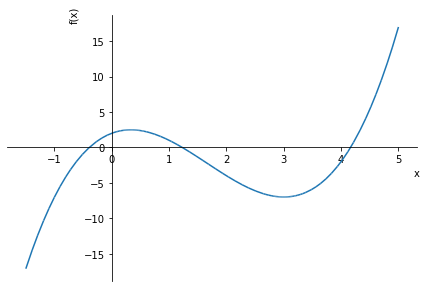

In [17]:
sym.plot(expr,(x,-1.5,5)); # é fácil plotar o gráfico de uma função

## Mais operações

Vejamos alguns exemplos de como usar sympy em Cálculo...

In [18]:
z = symbols("z")
expr = x**3 + 4*x*y - z
expr.subs([(x, 2), (y, 4), (z, 0)])

40

In [19]:
expr = sqrt(8)

In [20]:
expr

2*sqrt(2)

In [21]:
expr.evalf()

2.82842712474619

In [22]:
pi.evalf(100)

3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117068

In [23]:
expr = cos(2*x)
expr.evalf(subs={x: 2.4})

0.0874989834394464

Já vimos que com o comando “diff” podemos realizar uma derivação

In [24]:
diff(exp(2*x),x,3) # calcula a terceira derivada de exp(2*x)

8*exp(2*x)

Podemos aplicar derivadas em objetos mais complexos, como matrizes, por exemplo. Primeiro, definimos uma matriz de variáveis e funções simbólicas com o comando Matrix()

In [25]:
G = Matrix([[x**2,y+x],[2*x**3*y, 5*y**3]])
G

Matrix([
[    x**2,  x + y],
[2*x**3*y, 5*y**3]])

In [26]:
diff(G,x) # a matriz G foi definida acima

Matrix([
[     2*x, 1],
[6*x**2*y, 0]])

Para calcular derivadas parciais, como $\dfrac{\partial x}{\partial x \partial y}e^{(x^{2}+y^{3})}$

In [27]:
diff(exp(x**2+y**3),x,y) # derivadas parciais com relação a x e y

6*x*y**2*exp(x**2 + y**3)

In [28]:
f, g = symbols('f g', cls=Function)
f(x)

f(x)

In [29]:
f(x).diff()

Derivative(f(x), x)

In [30]:
diffeq = Eq(f(x).diff(x, x) - 2*f(x).diff(x) + f(x), sin(x))
diffeq

Eq(f(x) - 2*Derivative(f(x), x) + Derivative(f(x), (x, 2)), sin(x))

In [31]:
dsolve(diffeq, f(x))

Eq(f(x), (C1 + C2*x)*exp(x) + cos(x)/2)

SimPy pode entender LaTeX e logo manipula-lo, por exemplo para computar uma derivada. Isto pode poupar muito tempo!

Formula:

\begin{equation}
y = log(\frac{1-\alpha}{\alpha\times\beta}x) 
\end{equation}

Codigo:

`y = log(\frac{1-\alpha}{\alpha\times\beta}x)`

In [32]:
from sympy.parsing.latex import parse_latex
x = symbols('x')
g = sym.log(x)
y = parse_latex(r'g(\frac{1-\alpha}{\alpha\times\beta}x)')

display(y)

sym.diff(y,x)

ANTLR runtime and generated code versions disagree: 4.9.2!=4.7.2
ANTLR runtime and generated code versions disagree: 4.9.2!=4.7.2


g(x*((1 - alpha)/((alpha*beta))))

(1/(alpha*beta))*(1 - alpha)*Subs(Derivative(g(_xi_1), _xi_1), _xi_1, x*((1 - alpha)/((alpha*beta))))

### Geração de código LaTeX com SymPy
Também pode ser gerado código LaTeX a partir de expressões simbólicas

In [33]:
x = list(sym.symbols('x:2'))  # Vector (list of symbols)
x

[x0, x1]

In [34]:
H = x[0]**2/2 + sym.cosh(10*x[1]/sym.pi)-1
H

x0**2/2 + cosh(10*x1/pi) - 1

In [35]:
from sympy.printing import latex

In [36]:
print(latex(H))    # Print latex code

\frac{x_{0}^{2}}{2} + \cosh{\left(\frac{10 x_{1}}{\pi} \right)} - 1


$$\frac{x_{0}^{2}}{2} + \cosh{\left(\frac{10 x_{1}}{\pi} \right)} - 1$$

### Geração de código em linguagens de baixo nível (C, Fortran) with SimPy

In [37]:
from sympy.printing import ccode, fcode

In [38]:
H

x0**2/2 + cosh(10*x1/pi) - 1

In [39]:
ccode(H)    # Print C code

'(1.0/2.0)*pow(x0, 2) + cosh(10*x1/M_PI) - 1'

In [40]:
x,tau = symbols("x tau")
expr = Piecewise((x + 1, x > 0), (x, True)) # from https://docs.sympy.org/latest/modules/codegen.html
print(fcode(expr, tau))

      if (x > 0) then
         tau = x + 1
      else
         tau = x
      end if


Se você estiver interessado em aprender mais sobre geração de código usando Sympy, sugiro a leitura do tutorial [Automatic Code Generation with SymPy](https://www.sympy.org/scipy-2017-codegen-tutorial/)

# Linguagem de domínio específico (Domain-Specific Language - DSL)

Linguagens de Domínio Específico são linguagens projetadas com uma aplicação específica em mente, como uma maneira de expressar soluções para problemas de maneira mais simples e direta que a combinação de uma linguagem de programação de propósito geral e uma biblioteca.

1. Abordam um domínio de aplicação específico
2. Não obrigam o conhecimento avançado de programação
3. Interface próxima ao domínio.

<p>
    <img src="devito.png" style="float: left; margin: 10px; width:100px" />
    Considerando essa simples definição, um exemplo concreto de uma DSL é <a style = " white-space:nowrap; " href="https://www.devitoproject.org/">Devito</a>, uma nova DSL para diferenças finitas que utiliza o pacote SymPy para gerar código C paralelo apartir da definição de um operador simbólico de alto nível. Devito tem como objetivo principal a geração de kernels de propagação de ondas para problemas de inversão sísmica e, portanto, oferece uma hierarquia de abstração que permite não apenas a geração de kernels de estêncil de uma forma rápida, mas também uma variedade de recursos específicos do domínio sísmico, necessários em um contexto científico real
</p>

## Diferenças Finitas

Uma técnica para a obtenção da solução numérica de uma equação diferencial parcial,
em que substitui as derivadas contínuas (e condições de fronteira e iniciais) pelas
fórmulas das diferenças que envolvem somente valores discretos associados com
posições da malha. Em toda solução numérica a equação diferencial parcial é
substituída por uma aproximação discreta, ou seja, a solução numérica é conhecida somente para um número finito de pontos no domínio físico, enquanto que a solução
analítica deve satisfazer a equação diferencial parcial em cada ponto da região. A
aproximação discreta resulta em um conjunto de equações algébricas que são
calculadas para valores discretos desconhecidos. O conjunto finito de pontos em que
se considera discretizado o domínio é chamado de malha e os pontos chamados de
pontos nodais. 

<p class="alert alert-warning" role="alert"><strong>Atenção!</strong> Devito atualmente só soporta o <strong> Esquema explícito.</strong> Quando é utilizado o
resultado de uma solução num instante anterior já conhecida para calcular a solução
posterior desejada, o esquema de discretização é dito explícito. </p>



## Convecção 1D

Iremos começar nossa discussão da DSL Devito com a solução numérica de uma Equação Diferencial Parcial (EDP) simples ([baseados no Tutorial da profª Lorena Barba; 12 steps to Navier–Stokes](https://github.com/barbagroup/CFDPython/blob/master/lessons/01_Step_1.ipynb)):

A Equação da convecção (ou advecção) linear unidimensional é o modelo mais simples que pode ser usado para aprendermos alguma coisa a respeito da solução numérica de EDPs.

\begin{equation}
\frac{\partial u}{\partial t} = - c \frac{\partial u}{\partial x}
\end{equation}

sujeito à condição inicial $u(x,0)\equiv u_0(x)$ no domínio $[0,L]$. A solução exata para esta equação é dada por
\begin{equation}
u(x,t) = u_0(x-ct)
\end{equation}

Discretizamos esta equação no espaço e no tempo, usando o esquema de diferenças finitas progressivas (Forward Difference) para a derivada do tempo e 
o esquema de diferenças finitas regressivas (Backward Difference) para a derivada espacial. Iremos discretizar a coordenada espacial $x$ em pontos que indexamos de $i = 0$ a $N$, e o passo de tempo terá o tamanho $\Delta t$.

Da definição da derivada (apenas removendo o limite), nós sabemos que para um $\Delta x$
suficientemente pequeno:

\begin{equation}
\frac{\partial u}{\partial x} \approx \frac{u(x+\Delta x)- u(x)}{\Delta x}
\end{equation}

Nossa equação discreta, então, é:

\begin{equation}
\frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t} + c\frac{u_{i}^{n}- u_{i-1}^{n}}{\Delta x}
\end{equation}

sendo que $n$ e $n+1$ representam dois passos consecutivos no tempo, e $i-1$ e $i$ são dois
pontos vizinhos da coordenada $x$ discretizada. Dadas as condições iniciais, a única incógnita nessa
discretização é $u_{i}^{n+1}$. Nós isolamos essa incógnita na equação para resolver o problema seguindo
uma marcha no tempo:
    
\begin{equation}
u_{i}^{n+1} = u_{i}^{n}-c\dfrac{\Delta t}{\Delta x}(u_{i}^{n}-u_{i-1}^{n})
\end{equation}

### Vamos lá
Primeiro: devemos carregar nossos bibliotecas para lidar com vetores (arrays) e gráficos (plots).

In [41]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt

Vamos começar definindo uma condição inicial - vamos usar:

\begin{equation}
u(x,0)=\left\{
    \begin{array}{l}
      2 \quad\textrm{para} \quad 0,5 \le x \le 1,\\
      1 \quad\forall x \quad \textrm{em} \quad (0,2)
    \end{array}
  \right.
\end{equation}

No código abaixo, nós definimos uma variável chamada $nx$ que representará o número de nós (ou pontos) na grade espacial, e a variável $dx$ que representará a distância entre cada par de pontos adjacentes. Nós também podemos definir um passo de tempo $dt$, o número de passos de tempo, $nt$, e o valor da velocidade da onda: iremos manter as coisas simples e fazer $c=1.$ Também declararamos nossas condições iniciais.

[0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575
 0.6   0.625 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875
 0.9   0.925 0.95  0.975 1.    1.025 1.05  1.075 1.1   1.125 1.15  1.175
 1.2   1.225 1.25  1.275 1.3   1.325 1.35  1.375 1.4   1.425 1.45  1.475
 1.5   1.525 1.55  1.575 1.6   1.625 1.65  1.675 1.7   1.725 1.75  1.775
 1.8   1.825 1.85  1.875 1.9   1.925 1.95  1.975 2.   ]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1.]


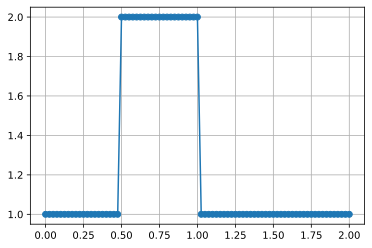

In [42]:
nx = 81 # tente mudar este número de 41 para 81 e rodar tudo novamente ... o que acontece?
dx = 2/(nx-1)
nt = 25
dt = .02
c = 1 # suponha velocidade da onda c = 1
x = np.linspace(0,2,nx)
u = np.ones(nx)      # numpy function ones()
u[int(.5 / dx):int(1 / dx + 1)] = 2  # setting u = 2 between 0.5 and 1 as per our I.C.s
print(x)
print(u)
plt.plot(x,u,'o-')
plt.grid()

In [43]:
un = np.ones(nx) #initialize a temporary array

for n in range(nt):  #loop for values of n from 0 to nt, so it will run nt times
    un = u.copy() ##copy the existing values of u into un
    for i in range(1, nx): ## you can try commenting this line and...
    #for i in range(nx): ## ... uncommenting this line and see what happens!
        u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])

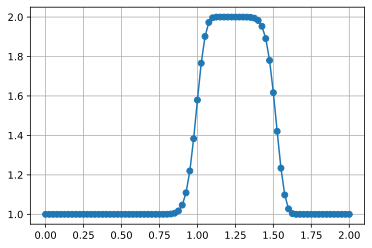

In [44]:
plt.plot(x, u, 'o-')
plt.grid()

## Implementação com Devito

Agora queremos recriar o exemplo acima por meio de um operador Devito. Para fazer isso, podemos começar 
definindo nossa grade computacional e criando uma função `u` como a função simbólica `devito.TimeFunction`. 
O ponto central a se notar aqui é que esta é uma das funções simbólicas de Devito, que tem um papel duplo na 
criação de solucionadores de diferenças finitas:
    
1. Elas se comportam simbolicamente como objetos `sympy.Function`, para que possamos construir derivadas e usá-las 
em expressões simbólicas, herdando assim todo o poder de manipulação simbólica automatizada que o SymPy fornece.
2. Elas agem como contêineres para dados do usuário, fornecendo uma propriedade `.data` que envolve o espaço 
de memória alocado automaticamente em uma NumPy array.

O tipo específico `TimeFunction` que usaremos para declarar nossa variável `u`, está ciente do fato de que queremos implementar um algoritmo de avanço no tempo com ele. Assim, o objeto `u` declarará dois buffers (uma vez que a ordem temporal padrão de uma `TimeFunction` é` 1`) de forma `nx` para nós, conforme definido pelo objeto `Grid`, e os apresentará como `u.data[0]` e `u.data[1]`. Vamos preencher o buffer inicial com alguns dados e dar uma olhada:

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1.] (2, 81) 162


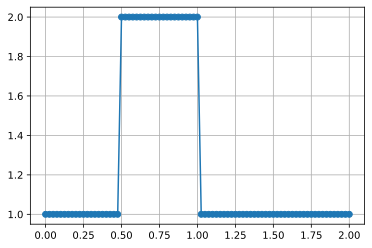

In [45]:
#NBVAL_IGNORE_OUTPUT
from examples.cfd import plot_field, init_hat
from devito import Grid, TimeFunction

grid = Grid(shape=(nx,), extent=(2.,))
u = TimeFunction(name='u', grid=grid)

u.data[0][:] = 1.
u.data[0][int(.5 / dx):int(1 / dx + 1)] = 2.
# Note que u.data[0] == u.data[0,:]
print(u.data[0],u.data.shape,u.data.size)
plt.plot(x,u.data[0],'o-')
plt.grid()

Legal. Agora podemos ver como derivar nosso estêncil de 3 pontos usando os recursos simbólicos dados à nossa 
função `u` por SymPy. Para isso, primeiro construiremos nossos termos com as derivadas no espaço e no tempo. Para 
a derivada progressiva no tempo, podemos facilmente usar a notação abreviada de Devito `u.dt` para denotar a 
primeira derivada no tempo e `u.dxl`para denotar a derivada espaciail. Observe que o `l` significa que estamos 
usando as diferenças finitas à "esquerda" ou regressiva aqui para aderir à discretização usada anteriormente.

A partir dos termos resultantes, podemos criar um objeto `sympy.Equation` que contém a equação totalmente discretizada, mas a partir de uma notação de alto nível, como mostrado abaixo.

In [46]:
from devito import Eq

# Specify the `interior` flag so that the stencil is only
# applied to the interior of the domain.
eq = Eq(u.dt + c*u.dxl, subdomain=grid.interior)

print(eq)
eq

Eq(Derivative(u(t, x), x) + Derivative(u(t, x), t), 0)


Eq(Derivative(u(t, x), x) + Derivative(u(t, x), t), 0)

In [47]:
u.forward

u(t + dt, x)

A etapa acima resultou em uma versão totalmente discretizada de nossa equação, que inclui símbolos de espaço 
reservado (*placeholder*) para o espaçamento no tempo (`dt`) e espaço (`h`). Esses símbolos são baseados em uma 
convenção interna e serão substituídos posteriormente quando construirmos um operador.

Mas antes de podermos construir um operador, primeiro precisamos mudar nossa expressão discretizada para que estejamos atualizando o ponto de avanço no estêncil em nosso esquema de *timestepping* - Devito fornece outra notação abreviada para isso: `u.forward`. Para o reordenamento simbólico, SymPy vem ao resgate com o comando `solve` que podemos usar para reorganizar nossa equação

In [48]:
from devito import solve
from sympy import nsimplify, pprint

stencil = solve(eq, u.forward)

pprint(stencil)

   ⎛  ∂             u(t, x)⎞
dt⋅⎜- ──(u(t, x)) + ───────⎟
   ⎝  ∂x               dt  ⎠


Agora podemos usar esta expressão de estêncil para criar um `Operator`. Esse `Operator` basicamente se comportará como uma função Python que podemos chamar para aplicar o estêncil 
criado sobre nossos dados associados, contanto que forneçamos todas as incógnitas necessárias. Nesse caso, 
precisamos fornecer o número de passos no tempo por meio da palavra-chave `time` e o tamanho do passo de tempo 
por meio de `dt` (ambos foram definidos acima):

In [49]:
#NBVAL_IGNORE_OUTPUT
from devito import Operator

# Reset our initial condition in both buffers.
# This is required to avoid 0s propagating into
# our solution, which has a background value of 1.
for i in range(u.data.shape[0]):
    u.data[i][:] = 1.
    u.data[i][int(.5 / dx):int(1 / dx + 1)] = 2.

# Create an operator that updates the forward stencil point
op = Operator(Eq(u.forward, stencil, subdomain=grid.interior))

# Apply the operator for a number of timesteps
op.apply(time=nt, dt=dt)

Operator `Kernel` ran in 0.01 s


PerformanceSummary([(PerfKey(name='section0', rank=None),
                     PerfEntry(time=1e-06, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[]))])

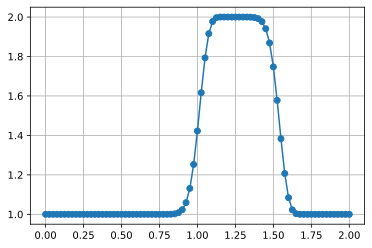

In [50]:
plt.plot(np.linspace(0, 2, nx), u.data[0], 'o-')
plt.grid()

In [51]:
print(op.ccode)

#define _POSIX_C_SOURCE 200809L
#define START_TIMER(S) struct timeval start_ ## S , end_ ## S ; gettimeofday(&start_ ## S , NULL);
#define STOP_TIMER(S,T) gettimeofday(&end_ ## S, NULL); T->S += (double)(end_ ## S .tv_sec-start_ ## S.tv_sec)+(double)(end_ ## S .tv_usec-start_ ## S .tv_usec)/1000000;

#include "stdlib.h"
#include "math.h"
#include "sys/time.h"
#include "xmmintrin.h"
#include "pmmintrin.h"

struct dataobj
{
  void *restrict data;
  int * size;
  int * npsize;
  int * dsize;
  int * hsize;
  int * hofs;
  int * oofs;
} ;

struct profiler
{
  double section0;
} ;


int Kernel(const float dt, const float h_x, struct dataobj *restrict u_vec, const int i0x_ltkn, const int i0x_rtkn, const int time_M, const int time_m, const int x_M, const int x_m, struct profiler * timers)
{
  float (*restrict u)[u_vec->size[1]] __attribute__ ((aligned (64))) = (float (*)[u_vec->size[1]]) u_vec->data;

  /* Flush denormal numbers to zero in hardware */
  _MM_SET_DENORMALS_ZERO_MODE(_MM_DENORMA

### Outra condição inicial

Agora vamos usar outra condição inicial $u(x,0)\equiv u_0(x)=sin(\omega x)$

0.025


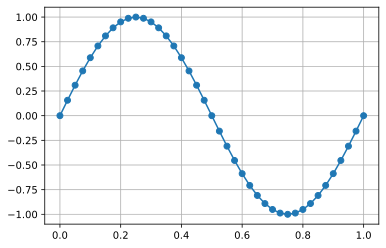

In [52]:
nx = 41
L = 1.0
dx = L/(nx-1)
print(dx)
x = np.linspace(0,L,nx)
u = np.sin(2.0*np.pi*x)
plt.plot(x,u,'-o')
plt.grid()

0.025 40
41 (41,)


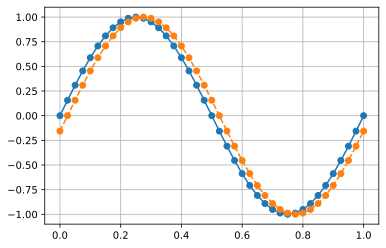

In [53]:
c = 1.0 # m/s - wave speed
dt = dx/c  # run just at the CFL condition
cfl = c*dt/dx
print(dt, int(1./dt))

un = u.copy() ##copy the existing values of u into un
u[1:-1] = un[1:-1] - cfl * (un[1:-1] - un[:-2])
u[-1] = un[-1] - cfl*(un[-1] - un[-2]) # compute last point on the right using periodicity
u[0] = u[-1] # set periodic boundary on the left
print(u.size,u.shape)
plt.plot(x,un,'-o',x,u,'--o')
plt.grid()

In [54]:
c = 1.0 # m/s - wave speed
dt = dx/c  # run just at the CFL condition
cfl = c*dt/dx
print(dt, int(1./dt))
u = np.sin(2.0*np.pi*x)

for n in range(nt):  #loop for values of n from 0 to nt, so it will run nt times
    un = u.copy() ##copy the existing values of u into un
    u[1:-1] = un[1:-1] - cfl * (un[1:-1] - un[:-2])
    u[-1] = un[-1] - cfl*(un[-1] - un[-2]) # compute last point on the right using periodicity
    u[0] = u[-1] # set periodic boundary on the left
print(u.size,u.shape)

0.025 40
41 (41,)


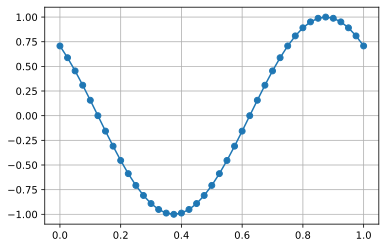

In [55]:
plt.plot(np.linspace(0,L,nx),u,'-o')
plt.grid()

[ 0.0000000e+00  1.5643446e-01  3.0901700e-01  4.5399049e-01
  5.8778524e-01  7.0710677e-01  8.0901700e-01  8.9100653e-01
  9.5105654e-01  9.8768836e-01  1.0000000e+00  9.8768836e-01
  9.5105654e-01  8.9100653e-01  8.0901700e-01  7.0710677e-01
  5.8778524e-01  4.5399049e-01  3.0901700e-01  1.5643446e-01
  1.2246469e-16 -1.5643446e-01 -3.0901700e-01 -4.5399049e-01
 -5.8778524e-01 -7.0710677e-01 -8.0901700e-01 -8.9100653e-01
 -9.5105654e-01 -9.8768836e-01 -1.0000000e+00 -9.8768836e-01
 -9.5105654e-01 -8.9100653e-01 -8.0901700e-01 -7.0710677e-01
 -5.8778524e-01 -4.5399049e-01 -3.0901700e-01 -1.5643446e-01
 -2.4492937e-16] (2, 41) 82


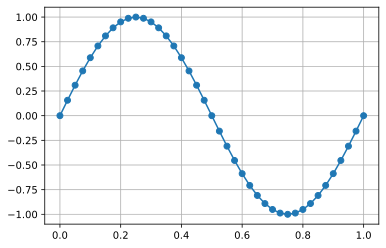

In [56]:
grid = Grid(shape=(nx,), extent=(1.,))
u = TimeFunction(name='u', grid=grid)

u.data[0][:] = np.sin(2.0*np.pi*x)
# Note que u.data[0] == u.data[0,:]
print(u.data[0],u.data.shape,u.data.size)
plt.plot(x,u.data[0],'o-')
plt.grid()

In [57]:
eq = Eq(u.dt + c*u.dxl, subdomain=grid.interior)

stencil = solve(eq, u.forward)
update = Eq(u.forward, stencil)#, subdomain=grid.interior)
update


Eq(u(t + dt, x), dt*(-1.0*Derivative(u(t, x), x) + u(t, x)/dt))

In [58]:
x = grid.dimensions
t = grid.stepping_dim
bc_left = Eq(u[t + 1, 0], u[t + 1, nx-1])

In [59]:
for i in range(u.data.shape[0]):
    u.data[i][:] = np.sin(2.0*np.pi*np.linspace(0,L,nx))
    
#op2 = Operator([update], opt='noop')
op2 = Operator([update]+[bc_left], opt='noop')
op2(time=0, dt=dt)

Operator `Kernel` ran in 0.01 s


PerformanceSummary([(PerfKey(name='section0', rank=None),
                     PerfEntry(time=1e-06, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[]))])

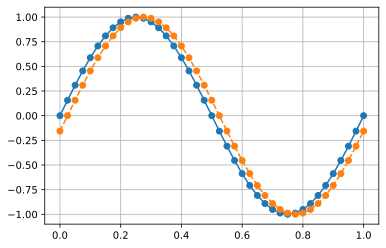

In [60]:
plt.plot(np.linspace(0,L,nx),u.data[0],'o-',np.linspace(0,L,nx),u.data[1],'--o')
plt.grid()

In [61]:
print(op2.ccode)

#define _POSIX_C_SOURCE 200809L
#define START_TIMER(S) struct timeval start_ ## S , end_ ## S ; gettimeofday(&start_ ## S , NULL);
#define STOP_TIMER(S,T) gettimeofday(&end_ ## S, NULL); T->S += (double)(end_ ## S .tv_sec-start_ ## S.tv_sec)+(double)(end_ ## S .tv_usec-start_ ## S .tv_usec)/1000000;

#include "stdlib.h"
#include "math.h"
#include "sys/time.h"

struct dataobj
{
  void *restrict data;
  int * size;
  int * npsize;
  int * dsize;
  int * hsize;
  int * hofs;
  int * oofs;
} ;

struct profiler
{
  double section0;
} ;


int Kernel(const float dt, const float h_x, struct dataobj *restrict u_vec, const int time_M, const int time_m, const int x_M, const int x_m, struct profiler * timers)
{
  float (*restrict u)[u_vec->size[1]] __attribute__ ((aligned (64))) = (float (*)[u_vec->size[1]]) u_vec->data;

  for (int time = time_m, t0 = (time)%(2), t1 = (time + 1)%(2); time <= time_M; time += 1, t0 = (time)%(2), t1 = (time + 1)%(2))
  {
    /* Begin section0 */
    START_TIMER(sect

In [62]:
for i in range(u.data.shape[0]):
    u.data[i][:] = np.sin(2.0*np.pi*np.linspace(0,L,nx))
    
op2(time=nt, dt=dt)

Operator `Kernel` ran in 0.01 s


PerformanceSummary([(PerfKey(name='section0', rank=None),
                     PerfEntry(time=4.9999999999999996e-06, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[]))])

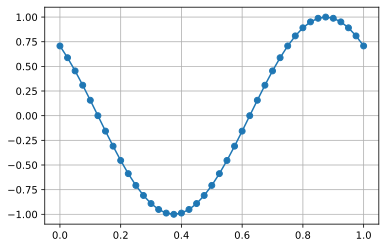

In [63]:
plt.plot(np.linspace(0,L,nx),u.data[1],'o-')
plt.grid()

# Modelagem sísmica

Os estudos de modelagem são de grande relevância na investigação e prospecção de petróleo. Um dos
processos de investigação do meio geológico é o da utilização de um modelo físico (acústico, anisotropico, elastico etc) na implementação numérica da equação da onda e assim
obter informações de subsuperfície (snapshots, sismogramas).

O método de diferenças finitas soluciona a equação da onda (uma EDP), substituindo as derivadas parciais no espaço e no tempo por suas aproximações de diferenças finitas em uma malha retangular discretizada.

Iremos estudar a **Solução da equação da onda acústica pelo método das diferenças finitas** através de um [Jupyter Notebook](https://github.com/devitocodes/devito/blob/master/examples/seismic/tutorials/01_modelling.ipynb) do repositorio oficial do [Devito](https://github.com/devitocodes/devito).